In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [3]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
# data.drop(columns=["timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers', 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)
# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)


In [4]:
data.drop(columns=['ant1_amplitude', 'ant2_amplitude', 'subcarriers','coord1', 'coord2', "rssi", "rssi1", "rssi2"], inplace=True)

In [5]:

features_scaled = ["ant1_phase", "ant2_phase"]#, "rssi", "rssi1", "rssi2"]
X = data.copy()
features = data.columns

# Separate the columns that need to be scaled
columns_to_scale = [col for col in X.columns if col not in features_scaled]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the columns that need to be scaled
X_scaled_part = scaler.fit_transform(X[columns_to_scale])

# Create a DataFrame for the scaled part, with the correct column names
X_scaled_df = pd.DataFrame(X_scaled_part, columns=columns_to_scale)

# Combine the scaled columns with the unscaled columns
X_scaled = pd.concat([X_scaled_df, X[features_scaled]], axis=1)

# Reorder columns to match the original DataFrame's structure (optional)
X_scaled = X_scaled[X.columns]

X_scaled.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,rssi1,rssi2,rssi3,payload_length,block_length,ant1_phase,ant2_phase,with_receiver,ant1_amplitude_cluster,ant2_amplitude_cluster
0,1.231404,-2.395136,0.002533,-0.009847,0.0,-1.615045,0.0,0.0,0.0,-2.395136,...,-0.591057,-0.617024,0.0,0.767275,-0.798548,0.704058,0.912444,0.0,-0.69164,-0.255681
1,1.231404,-2.395136,0.002533,-0.009847,0.0,-1.615045,0.0,0.0,0.0,-2.395136,...,-0.591057,-0.617024,0.0,0.767275,-0.798548,0.681169,0.885140,0.0,-0.69164,-0.255681
2,1.231404,-2.395136,0.002533,-0.009847,0.0,-1.615045,0.0,0.0,0.0,-2.395136,...,-0.591057,-0.617024,0.0,0.767275,-0.798548,0.656483,0.853598,0.0,-0.69164,-0.255681
3,1.231404,-2.395136,0.002533,-0.009847,0.0,-1.615045,0.0,0.0,0.0,-2.395136,...,-0.591057,-0.617024,0.0,0.767275,-0.798548,0.632759,0.841939,0.0,-0.69164,-0.255681
4,1.231404,-2.395136,0.002533,-0.009847,0.0,-1.615045,0.0,0.0,0.0,-2.395136,...,-0.591057,-0.617024,0.0,0.767275,-0.798548,0.602048,0.820009,0.0,-0.69164,-0.255681


In [6]:
for i in range(1, X_scaled.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X_scaled)

PCA with 1 components, sum is 0.9877462790787966.


In [7]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.98774628]


In [8]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [9]:
print(features)

Index(['timestamps', 'csi_len', 'channel', 'err_info', 'noise_floor', 'rate',
       'bandWidth', 'num_tones', 'nr', 'nc', 'rssi', 'rssi1', 'rssi2', 'rssi3',
       'payload_length', 'block_length', 'ant1_phase', 'ant2_phase',
       'with_receiver', 'ant1_amplitude_cluster', 'ant2_amplitude_cluster'],
      dtype='object')


In [10]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=data.columns)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.001537  0.027934 -0.000021 -0.000654 -1.654361e-24  0.023996   

      bandWidth  num_tones   nr        nc  ...     rssi1     rssi2  rssi3  \
0 -7.888609e-31       -0.0 -0.0  0.027934  ...  0.540137  0.586941   -0.0   

   payload_length  block_length  ant1_phase  ant2_phase  with_receiver  \
0        0.000224       0.01668     0.00006   -0.000096           -0.0   

   ant1_amplitude_cluster  ant2_amplitude_cluster  
0                0.005249                 0.00067  

[1 rows x 21 columns]


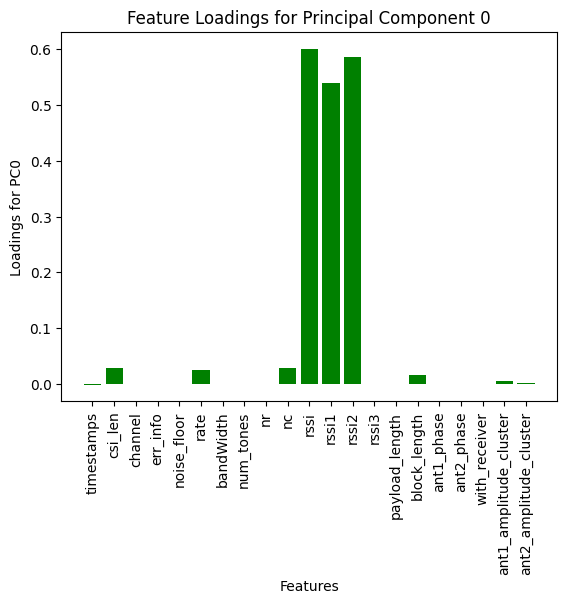

In [11]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [12]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.98774628]


In [13]:
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [1.]
SUM: 0.9999999999999702


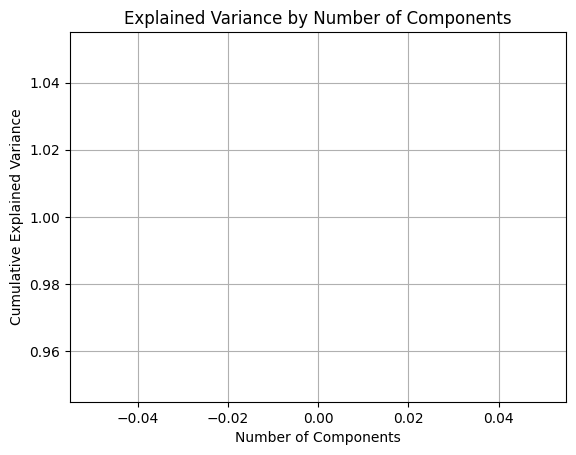

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [15]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
